In [1]:
pip install transformers

Mask-Generation

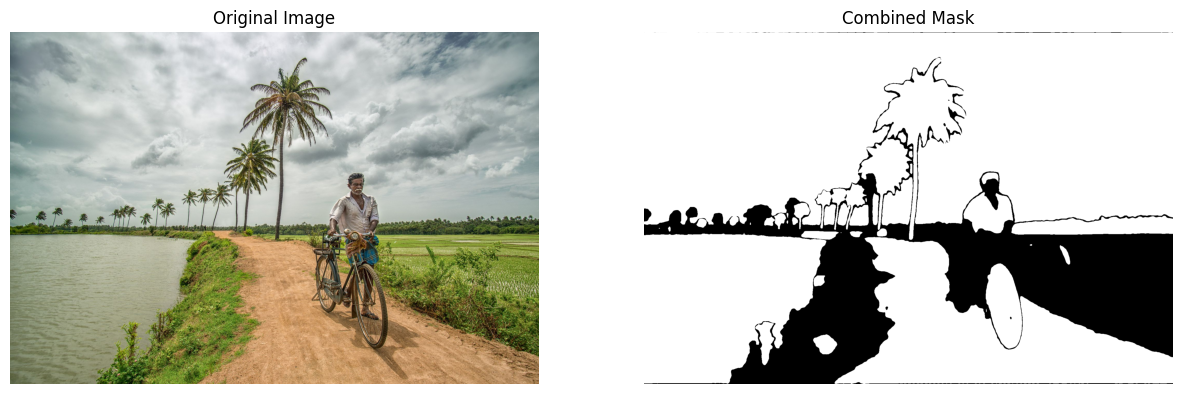

In [16]:
from transformers import pipeline
import numpy as np
import matplotlib.pyplot as plt
import requests
from PIL import Image
from io import BytesIO

# Load the mask generation pipeline
generator = pipeline(model="facebook/sam-vit-base", task="mask-generation", device=0)

# Provide an input image URL
image_url = "https://th.bing.com/th/id/R.276b88f5d9e406299f9746323b1f56ea?rik=E9trP%2bki4K81FQ&pid=ImgRaw&r=0"

# Fetch the image from the URL
response = requests.get(image_url)
img = Image.open(BytesIO(response.content))

# Generate masks for the image
result = generator(image_url)

# Access masks and scores
masks = result['masks']
scores = result['scores']

# Combine all masks into a single mask
combined_mask = np.any(masks, axis=0)

# Create a figure with two subplots (side by side)
fig, axes = plt.subplots(1, 2, figsize=(15, 8))

# Display the original image
axes[0].imshow(img)
axes[0].set_title("Original Image")
axes[0].axis('off')

# Display the combined mask
axes[1].imshow(combined_mask, cmap='gray')
axes[1].set_title("Combined Mask")
axes[1].axis('off')

# Show the images
plt.show()
